In [1]:
import ultralytics
from ultralytics import YOLO

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch    
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [3]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

### Import modules

In [4]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

### For the classification model

In [5]:
import cv2
import numpy as np
img = cv2.imread(r"Data\test\images\553_IMG_7270.JPG")
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [6]:
import torch
from ultralytics import YOLO

In [7]:
# Load the trained model
import torch
model = YOLO(r"YOLO_v8n_model.pt")

In [ ]:
import torch

# Load the model checkpoint from the ".pt" file
checkpoint_path = r"YOLO_v8n_model.pt"
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))  # You can specify a different device

# Access the model's state dictionary
state_dict = checkpoint['model_state_dict']

# Access other training parameters
learning_rate = checkpoint['optimizer_state_dict']['param_groups'][0]['lr']
epoch = checkpoint['epoch']

# Print the learning parameters
print(f"Learning rate: {learning_rate}")
print(f"Epoch: {epoch}")

In [9]:
target_layers =[model.model.model[-2]]

### Eigen-cam results


0: 640x640 1 Dorsal_Palm_Region, 335.1ms
Speed: 10.5ms preprocess, 335.1ms inference, 14.5ms postprocess per image at shape (1, 3, 640, 640)


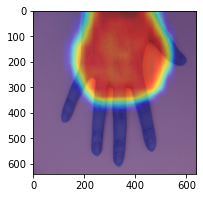

In [10]:
import matplotlib.pyplot as plt
cam = EigenCAM(model, target_layers)
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 640x640 1 Dorsal_Palm_Region, 261.7ms
Speed: 6.5ms preprocess, 261.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


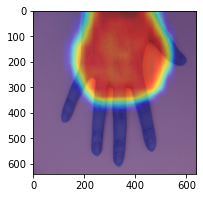

In [11]:
cam = EigenCAM(model, target_layers)
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

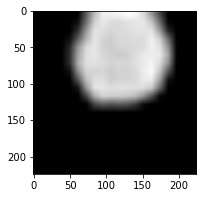

In [12]:
g_scale = cv2.resize(np.stack([grayscale_cam] * 3, axis=2), (224,224))

plt.imshow(g_scale, cmap='gray')
plt.show()

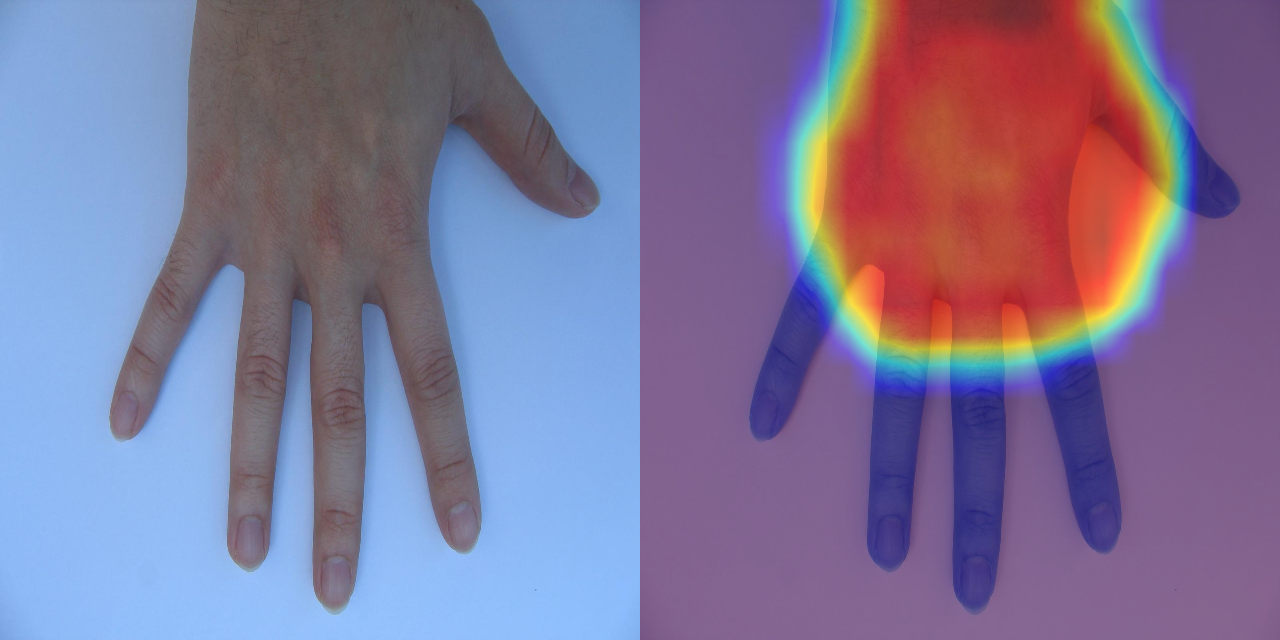

In [13]:
import cv2
import numpy as np
from PIL import Image

im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))